In [3]:
import Labber
import numpy as np
import matplotlib.pyplot as plt
import os
from fitTools.utilities import Watt2dBm, dBm2Watt, VNA2dBm

# this is title and TOC

4. [fist thign](#reference1)
3. [second thing](#reference2)
    1. [something else]()


# First looking at a power, frequency, and flux sweep of JPA to find max SNR

In [373]:
JPA0224_1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0224\NBR07-9_JPA_SNR_p_freq_flux_sweep.hdf5"
JPA0224_2 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0224\NBR07-9_JPA_SNR_p_freq_flux_sweep_2.hdf5"
JPA0225_1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_JPA_p_freq_flux_sweep.hdf5"
JPA0301_1 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_JPA_p_freq_flux_275mK.hdf5"
JPA0302_1 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_JPAsweep_275mK.hdf5"

In [374]:
lf = Labber.LogFile(JPA0302_1)
sig = lf.getData(name = 'SA - Signal')
linsig = dBm2Watt(sig)
# linsig = np.mean(linsig,axis = 0)

power = lf.getData(name = 'JPA pump - Power')
curr = lf.getData(name = 'JPA flux - Source current')
freq = lf.getData(name = 'JPA pump - Frequency')

In [375]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [376]:
freq.shape

(416, 16)

In [377]:
freq = np.reshape(freq, (16,26,16))

In [378]:
power = np.reshape(power, (16,26,16))

In [379]:
curr = np.reshape(curr, (16,26,16))

In [380]:
signal = np.reshape(linsig, (16,26,16,401))

In [381]:
snr = np.zeros((16,26,16))
noise = np.zeros((16,26,16))
for i in range(16):
    for j in range(26):
        for k in range(16):
            max_ind=np.argmax(signal[i,j,k,:])
            max_val=np.max(signal[i,j,k,:])
            mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
#             noisetemp=np.append(linsignal[i,j,k,:max_ind-75],linsignal[i,j,k,max_ind+75:])
            noisetemp = signal[i,j,k,mask]
            avg_noise=np.mean(noisetemp)
            snr[i][j][k] = Watt2dBm(max_val)-Watt2dBm(avg_noise)
            noise[i][j][k] = Watt2dBm(avg_noise)

In [382]:
snr[0][0][0]

16.49682123101867

<a name="reference1"></a>
## reference 1

In [383]:
np.max(snr)

18.509361466098248

In [384]:
ind_max_snr = np.unravel_index(np.argmax(snr, axis=None), snr.shape)

In [385]:
ind_max_snr

(11, 10, 10)

In [386]:
power[ind_max_snr]

-5.0

In [387]:
curr[ind_max_snr]*10**3

6.100000000000003

In [388]:
freq[ind_max_snr]*10**-9

4.5

In [23]:
def nlargest_indices(arr, n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr >= threshold)

def nsmallest_indices(arr, n):
    uniques = np.unique(arr)
    threshold = uniques[-n]
    return np.where(arr <= threshold)

In [389]:
ind1,ind2,ind3 = nlargest_indices(snr,5)

In [390]:
inds = nlargest_indices(snr,5)

In [391]:
snr[inds]

array([18.26001856, 18.21649494, 18.22010812, 18.50936147, 18.16376715])

In [392]:
noise[inds]

array([-67.20001856, -66.08649494, -67.09010812, -67.02936147,
       -66.89376715])

In [393]:
for i in range(len(ind1)):
    print('SNR = ', snr[ind1[i]][ind2[i]][ind3[i]])
    print('Noise = ', noise[ind1[i]][ind2[i]][ind3[i]])
    print('Pump Power = ', power[ind1[i]][ind2[i]][ind3[i]], ' dBm')
    print('Pump Frequency = ', freq[ind1[i]][ind2[i]][ind3[i]]*10**-9, ' GHz')
    print('Lisa Current = ', curr[ind1[i]][ind2[i]][ind3[i]]*10**3, ' mA \n')

SNR =  18.260018558181713
Noise =  -67.20001855818171
Pump Power =  -6.0  dBm
Pump Frequency =  4.46  GHz
Lisa Current =  5.200000000000001  mA 

SNR =  18.216494942692712
Noise =  -66.08649494269271
Pump Power =  -13.0  dBm
Pump Frequency =  4.34  GHz
Lisa Current =  5.300000000000001  mA 

SNR =  18.220108122889577
Noise =  -67.09010812288957
Pump Power =  -7.0  dBm
Pump Frequency =  4.48  GHz
Lisa Current =  5.400000000000001  mA 

SNR =  18.509361466098248
Noise =  -67.02936146609825
Pump Power =  -5.0  dBm
Pump Frequency =  4.5  GHz
Lisa Current =  6.100000000000003  mA 

SNR =  18.1637671477409
Noise =  -66.89376714774089
Pump Power =  -3.0  dBm
Pump Frequency =  4.5  GHz
Lisa Current =  6.5  mA 



<a name="reference2"></a>
# Setting the flux and sweep frequency and power

In [265]:
JPApofreq = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_JPA_p_freq_sweep.hdf5" #5.7 mA for base T
JPApofreq_2 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_JPA_p_freq_275mK.hdf5" #5.8 mA for 275 mK

In [266]:
lf = Labber.LogFile(JPApofreq_2)
sig = lf.getData(name = 'SA - Signal')
linsig = dBm2Watt(sig)
# linsig = np.mean(linsig,axis = 0)

power = lf.getData(name = 'JPA pump - Power')
# curr = lf.getData(name = 'JPA flux - Source current')
freq = lf.getData(name = 'JPA pump - Frequency')

In [267]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [268]:
freq.shape

(17, 11)

In [269]:
freq = np.reshape(freq, (17,11))

In [270]:
power = np.reshape(power, (17,11))

In [271]:
signal = np.reshape(linsig, (17,11,401))

In [272]:
snr = np.zeros((17,11))
noise = np.zeros((17,11))
for i in range(17):
    for j in range(11):
        max_ind=np.argmax(signal[i,j,:])
        max_val=np.max(signal[i,j,:])
        mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
#             noisetemp=np.append(linsignal[i,j,k,:max_ind-75],linsignal[i,j,k,max_ind+75:])
        noisetemp = signal[i,j,mask]
        avg_noise=np.mean(noisetemp)
        snr[i][j] = Watt2dBm(max_val)-Watt2dBm(avg_noise)
        noise[i][j] = Watt2dBm(avg_noise)

In [273]:
snr[0][0]

13.836250345267302

In [274]:
np.max(snr)

17.111563110088248

In [275]:
ind_max_snr = np.unravel_index(np.argmax(snr, axis=None), snr.shape)

In [276]:
ind_max_snr

(16, 9)

In [277]:
power[ind_max_snr]

-6.0

In [278]:
freq[ind_max_snr]*10**-9

4.45

In [279]:
ind1,ind2 = nlargest_indices(snr,5)

In [280]:
inds = nlargest_indices(snr,5)

In [281]:
snr[inds]

array([17.09163307, 16.87331731, 16.86877303, 17.1085145 , 17.11156311])

In [282]:
noise[inds]

array([-65.24163307, -66.69331731, -66.51877303, -66.6485145 ,
       -66.62156311])

In [283]:
for i in range(len(ind1)):
    print('SNR = ', snr[ind1[i]][ind2[i]])
    print('Noise = ', noise[ind1[i]][ind2[i]])
    print('Pump Power = ', power[ind1[i]][ind2[i]], ' dBm')
    print('Pump Frequency = ', freq[ind1[i]][ind2[i]]*10**-9, ' GHz \n')

SNR =  17.091633068479155
Noise =  -65.24163306847915
Pump Power =  -7.0  dBm
Pump Frequency =  4.38  GHz 

SNR =  16.873317313681206
Noise =  -66.6933173136812
Pump Power =  -8.0  dBm
Pump Frequency =  4.41  GHz 

SNR =  16.868773026923556
Noise =  -66.51877302692355
Pump Power =  -7.0  dBm
Pump Frequency =  4.41  GHz 

SNR =  17.108514500232268
Noise =  -66.64851450023227
Pump Power =  -7.0  dBm
Pump Frequency =  4.45  GHz 

SNR =  17.111563110088248
Noise =  -66.62156311008825
Pump Power =  -6.0  dBm
Pump Frequency =  4.45  GHz 



# JPA frequency 

In [284]:
JPAfreq1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_JPA_freq_sweep.hdf5" # -8.5 dBm and 5.7 mA 22 mK
JPAfreq2= r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_JPA_freq_275mK.hdf5" # -7 dBm and 5.8 mA 275 mK

In [285]:
lf = Labber.LogFile(JPAfreq2)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)

In [286]:
linsig = np.mean(linsig.reshape(35,3,401),axis = 1)

In [287]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [288]:
freq = lf.getData(name = 'JPA pump - Frequency')
print(freq.shape)
freq = np.squeeze(freq)

(35, 3)


In [289]:
SNR = []
MAX = []
NOISE = []
for i in range(len(freq)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

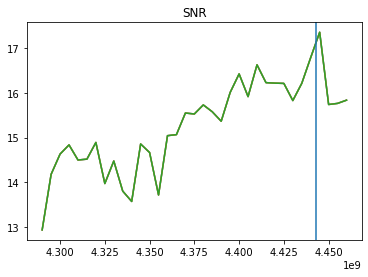

In [295]:
plt.plot(freq,SNR)
plt.title('SNR')
plt.axvline(4.443e9)

# JPA power

In [296]:
JPApower1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_JPA_power_sweep.hdf5" #4.355 GHz and 5.7 mA
JPApower2 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_JPA_power_275mK.hdf5" #4.443 GHz and 5.8 mA

In [297]:
lf = Labber.LogFile(JPApower2)
sig = lf.getData(name = 'SA - Signal')
linsig = dBm2Watt(sig)

In [299]:
linsig = np.mean(linsig.reshape(16,3,401),axis = 1)

In [300]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [301]:
power = lf.getData(name = 'JPA pump - Power')
print(power.shape)
power = np.squeeze(power)

(16, 3)


In [302]:
SNR = []
MAX = []
NOISE = []
for i in range(len(power)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

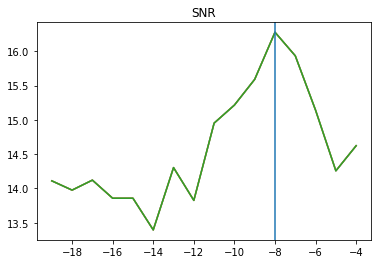

In [304]:
#JPApower2
plt.plot(power,SNR)
plt.title('SNR')
plt.axvline(-8)

# Now let's look at JPA flux

In [305]:
JPAflux1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_JPA_flux_sweep.hdf5" #4.355 GHz and -8.5 dBm
JPAflux2 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_JPA_flux_275mK.hdf5" #4.443 GHz and -8 dBm

In [306]:
lf = Labber.LogFile(JPAflux2)
sig = lf.getData(name = 'SA - Signal')

In [308]:
linsig = dBm2Watt(sig)
# linsig.shape
linsig = np.mean(linsig.reshape(17,3,401),axis = 1)

In [309]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [310]:
flux = lf.getData(name = 'JPA flux - Source current')
print(flux.shape)

(17, 3)


In [311]:
flux = np.squeeze(flux)
flux = flux[:,0]

In [312]:
SNR = []
MAX = []
NOISE = []
for i in range(len(flux)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

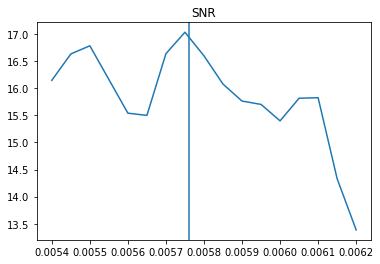

In [314]:
plt.plot(flux,SNR)
plt.title('SNR')
plt.axvline(5.76e-3)

# Set JPA flux at 5.78 mA, JPA pump frequency = 4.355 GHz at -8.5 dBm at 22 mK

# Set JPA flux at 5.76 mA, JPA pump frequency = 4.443 GHz at -8 dBm at 275 mK
## Sweep TWPA pump frequency and power

In [5]:
TWPA0214 = r"G:\Shared drives\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_TWPA_freq_power_sweep.hdf5"
TWPA0301 = r"G:\Shared drives\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_TWPA_freq_power_275mK.hdf5"

In [10]:
lf = Labber.LogFile(TWPA0301)
sig = lf.getData(name = 'SA - Signal')
linsig = dBm2Watt(sig)
# linsig = np.mean(linsig,axis = 0)

power = lf.getData(name = '10002A05 - Power')
freq = lf.getData(name = '10002A05 - Frequency')

In [7]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [8]:
freq.shape

(26, 11)

In [13]:
freq = np.reshape(freq, (26,11))

In [15]:
freq.shape

(26, 11)

In [320]:
power = np.reshape(power, (26,11))

In [321]:
signal = np.reshape(linsig, (26,11,401))

In [322]:
snr = np.zeros((26,11))
noise = np.zeros((26,11))
for i in range(26):
    for j in range(11):
        max_ind=np.argmax(signal[i,j,:])
        max_val=np.max(signal[i,j,:])
        mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
#             noisetemp=np.append(linsignal[i,j,k,:max_ind-75],linsignal[i,j,k,max_ind+75:])
        noisetemp = signal[i,j,mask]
        avg_noise=np.mean(noisetemp)
        snr[i][j] = Watt2dBm(max_val)-Watt2dBm(avg_noise)
        noise[i][j] = Watt2dBm(avg_noise)

In [323]:
snr[0][0]

15.82403303475968

In [324]:
np.max(snr)

17.711466056112513

In [325]:
ind_max_snr = np.unravel_index(np.argmax(snr, axis=None), snr.shape)

In [326]:
ind_max_snr

(24, 2)

In [327]:
power[ind_max_snr]

-3.0

In [328]:
freq[ind_max_snr]*10**-9

8.18

In [329]:
ind1,ind2 = nlargest_indices(snr,5)

In [330]:
inds = nlargest_indices(snr,5)

In [331]:
snr[inds]

array([17.49664691, 17.34587891, 17.31872223, 17.34509123, 17.71146606])

In [332]:
noise[inds]

array([-66.48664691, -66.83587891, -66.87872223, -66.70509123,
       -66.82146606])

In [333]:
for i in range(len(ind1)):
    print('SNR = ', snr[ind1[i]][ind2[i]])
    print('Noise = ', noise[ind1[i]][ind2[i]])
    print('Pump Power = ', power[ind1[i]][ind2[i]], ' dBm')
    print('Pump Frequency = ', freq[ind1[i]][ind2[i]]*10**-9, ' GHz\n')

SNR =  17.496646913977465
Noise =  -66.48664691397747
Pump Power =  -3.0  dBm
Pump Frequency =  7.7  GHz

SNR =  17.345878911371685
Noise =  -66.83587891137168
Pump Power =  -5.0  dBm
Pump Frequency =  7.960000000000001  GHz

SNR =  17.318722233102122
Noise =  -66.87872223310212
Pump Power =  -1.0  dBm
Pump Frequency =  8.1  GHz

SNR =  17.345091232076456
Noise =  -66.70509123207646
Pump Power =  -1.0  dBm
Pump Frequency =  8.16  GHz

SNR =  17.711466056112513
Noise =  -66.82146605611251
Pump Power =  -3.0  dBm
Pump Frequency =  8.18  GHz



# TWPA frequency 

In [406]:
TWPAfreq1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_TWPA_freq_sweep.hdf5" #power 1 dBm
TWPAfreq2 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_TWPA_freq_sweep_2.hdf5"
TWPAfreq3 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_TWPA_freq_275mK.hdf5" #power set to -3 dBm
TWPAfreq4 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_TWPA_freq_275mK_3.hdf5" #power -2 dBm
TWPAfreq5 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0302\NBR07-9_SNR_TWPA_freq_275mK.hdf5"

In [407]:
lf = Labber.LogFile(TWPAfreq5)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)

In [408]:
linsig = np.mean(linsig.reshape(201,3,401),axis = 1)

In [409]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [410]:
freq = lf.getData(name = '10002A05 - Frequency')
print(freq.shape)
freq = np.squeeze(freq)

(201, 3)


In [411]:
SNR = []
MAX = []
NOISE = []
for i in range(len(freq)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

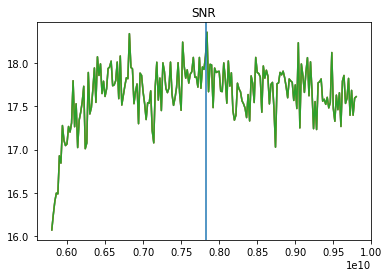

In [413]:
#TWPAfreq5
plt.plot(freq,SNR)
plt.title('SNR')
plt.axvline(7.83e9)

# TWPA power

In [341]:
TWPApower1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_TWPA_power_sweep.hdf5" # freq = 7.82 GHz
TWPApower2 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_TWPA_power_275mK.hdf5"


In [344]:
lf = Labber.LogFile(TWPApower2)
sig = lf.getData(name = 'SA - Signal')
linsig = dBm2Watt(sig)

In [345]:
linsig = np.mean(linsig.reshape(25,4,401),axis = 1)

In [346]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [347]:
power = lf.getData(name = '10002A05 - Power')
print(power.shape)
power = np.squeeze(power)

(25, 4)


In [348]:
SNR = []
MAX = []
NOISE = []
for i in range(len(power)):
    max_ind=np.argmax(linsig[i])
    max_val=np.max(linsig[i])
    mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
    noise=linsig[i][mask]
    avg_noise=np.mean(noise)
    snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
    SNR.append(snr)
    MAX.append(Watt2dBm(max_val))
    NOISE.append(Watt2dBm(avg_noise))

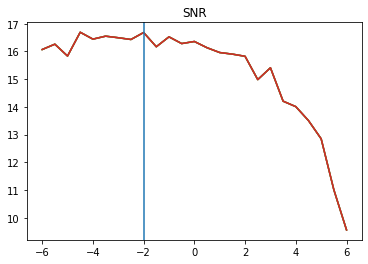

In [350]:
#TWPApower1
plt.plot(power,SNR)
plt.title('SNR')
plt.axvline(-2)

# SNR check both OFF

In [422]:
bothOFF1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_bothOFF.hdf5"
bothOFF2 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_bothOFF_2.hdf5"
bothOFF3 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_bothOFF_275mK.hdf5"  #275mK DA set to 40
bothOFF4 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_bothOFF_275mK_2.hdf5"  #275mK and DA set to 15
bothOFF5 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_bothOFF_275mK_3.hdf5"
bothOFF6 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0302\NBR07-9_SNR_bothOFF_275mK.hdf5"
bothOFF7 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0302\NBR07-9_SNR_bothOFF_backtobase.hdf5"

In [423]:
lf = Labber.LogFile(bothOFF7)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)
linsig = np.mean(linsig,axis = 0)

In [424]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [425]:
max_ind=np.argmax(linsig)
max_val=np.max(linsig)
mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
noise=linsig[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print("SNR = ", snr)
print("Signal = ", Watt2dBm(max_val))
print("Noise = ", Watt2dBm(avg_noise))

SNR =  14.436601119493517
Signal =  -52.98149957187917
Noise =  -67.41810069137269


# SNR check both ON

In [418]:
bothON1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0225\NBR07-9_SNR_bothON.hdf5"
bothON2 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_bothON_275mK.hdf5" #275mK DA set to 40
bothON3 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_bothON_275mK_2.hdf5"  #275mK and DA set to 15
bothON4 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_bothON_275mK_3.hdf5" #275mK DA set to 40
bothON5 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0301\NBR07-9_SNR_bothON_275mK_4.hdf5"
bothON6 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0302\NBR07-9_SNR_bothON_275mK.hdf5"
bothON7 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0302\NBR07-9_SNR_bothON_backtobase.hdf5"

In [419]:
lf = Labber.LogFile(bothON7)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)
linsig = np.mean(linsig,axis = 0)

In [420]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [421]:
max_ind=np.argmax(linsig)
max_val=np.max(linsig)
mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
noise=linsig[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print("SNR = ", snr)
print("Signal = ", Watt2dBm(max_val))
print("Noise = ", Watt2dBm(avg_noise))

SNR =  16.599430516723622
Signal =  -45.11930097912358
Noise =  -61.7187314958472


# SNR check JPA ON TWPA OFF

In [402]:
jpaON1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0224\NBR07-9_JPA_SNR_on.hdf5"
jpaON2 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0302\NBR07-9_SNR_JPAON_275mK.hdf5"
jpaON3 = r"G:\Shared drives\LFL\Labber\Data\2022\03\Data_0302\NBR07-9_SNR_JPAON_275mK_2.hdf5"

In [403]:
lf = Labber.LogFile(jpaON3)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)
linsig = np.mean(linsig,axis = 0)

In [404]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [405]:
max_ind=np.argmax(linsig)
max_val=np.max(linsig)
mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
noise=linsig[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print("SNR = ", snr)
print("Signal = ", Watt2dBm(max_val))
print("Noise = ", Watt2dBm(avg_noise))

SNR =  17.17455799436182
Signal =  -49.891363720367565
Noise =  -67.06592171472938


# SNR check JPA OFF TWPA ON

In [ ]:
twpaON1 = r"G:\Shared drives\LFL\Labber\Data\2022\02\Data_0214\NBR07-8_SNR_JPAOFF_TWPAON.hdf5"

In [ ]:
lf = Labber.LogFile(twpaON1)
sig = lf.getData(name = 'SA - Signal')
# s21 = lf.getData(name = 'VNA - S21')
linsig = dBm2Watt(sig)
linsig = np.mean(linsig,axis = 0)

In [ ]:
SAxdata,SAydata = lf.getTraceXY(y_channel='SA - Signal')

In [ ]:
max_ind=np.argmax(linsig)
max_val=np.max(linsig)
mask = np.logical_or(SAxdata < SAxdata[max_ind]-10e3, SAxdata > SAxdata[max_ind]+10e3)
noise=linsig[mask]
avg_noise=np.mean(noise)
snr = Watt2dBm(max_val)-Watt2dBm(avg_noise)
print("SNR = ", snr)
print("Signal = ", Watt2dBm(max_val))
print("Noise = ", Watt2dBm(avg_noise))